In [3]:
import os
import json
from collections import defaultdict
import matplotlib.pyplot as plt

In [4]:
with open(os.path.join('data', 'structures_df2_calc_with_bands_be.json')) as fhandle:
        df2 = json.load(fhandle)
with open(os.path.join('data', 'structures_rvv10_calc_with_bands_be.json')) as fhandle:
        rvv10 = json.load(fhandle)
with open(os.path.join('data', 'structures_revpbe_calc_with_bands_be.json')) as fhandle:
        revpbe = json.load(fhandle)

In [5]:
df2['41a0956f-91be-469e-8e98-58188e746301']

{'cell': [[16.8562741837162, 0.0, 0.0],
  [0.0, 7.22133640167749, 0.0],
  [0.0, 0.0, 6.91643636329717]],
 'volume': 841.902015349062,
 'binding_energy': {'relevant_dimension_of_highest_dimensionality_substructure': 121.724826359526,
  'binding_energy_per_substructure': -2.35420277139929,
  'number_of_atoms_in_bulk': 32,
  'uuid': '2964aca5-ac8d-4cc8-bf76-d9ca5c439fec',
  'delta_min': 0.7,
  'number_of_highest_dimensionality_substructures_in_bulk': 1,
  'sub_structure_spg': ['Pmma (51)'],
  'relevant_dimension_units': 'ang^2',
  'transformation_mat': [[0.0, 1.0, 0.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0]],
  'energy_units': 'eV',
  'sub_structure_dim': [2],
  'energy_bulk': -51375.7611599322,
  'sub_structure_formulas': ['Br22Nb8Rb2']},
 'uuid_pw': 'd7ec50df-0de7-4ee6-95dd-0d9cdd0ad19b'}

In [6]:
    binding_energies_raw = {}
    for uuid_key in set(df2).union(rvv10):
        subdict = {}
        df2_binding_energy = df2.get(uuid_key, {}).get('binding_energy', {})
        if df2_binding_energy:
            subdict['df2'] = df2_binding_energy
        rvv10_binding_energy = rvv10.get(uuid_key, {}).get('binding_energy', {})
        if rvv10_binding_energy:
            subdict['rvv10'] = rvv10_binding_energy
        if subdict:
            binding_energies_raw[uuid_key] = subdict
    
    print("Found {} entries, these should be set D of the Mounet paper, maybe there is one structure that has been 'removed' by hand".format(
        len(binding_energies_raw)))

    binding_energies = {}
    for key, val in binding_energies_raw.items():
        subdict = defaultdict(dict)
        subdict['sub_structure_formulas'] = []
        for method in ['rvv10', 'df2']:
            try:
                # meV / ang^2, with positive sign
                subdict[method] = ( -1000. *
                    val[method]['binding_energy_per_substructure']/
                    val[method]['relevant_dimension_of_highest_dimensionality_substructure'])
                subdict['sub_structure_formulas'] += val[method]['sub_structure_formulas'] # Might need to skip the non-2D ones
            except KeyError as exc:
                # Binding energy not computed with this method
                if str(exc) != "'{}'".format(method):
                    print(str(exc), method)
                    raise
        subdict['sub_structure_formulas'] = sorted(set(subdict['sub_structure_formulas']))
        binding_energies[key] = dict(subdict.items())
    BN_structures = {k: v for k, v in binding_energies.items() if 'BN' in v['sub_structure_formulas']}
    print("Structures containing BN:")
    print(json.dumps(BN_structures, indent=2))

Found 2663 entries, these should be set D of the Mounet paper, maybe there is one structure that has been 'removed' by hand
Structures containing BN:
{
  "f7e2ff32-27ed-4c89-9c3c-4acbaffbb897": {
    "sub_structure_formulas": [
      "BN"
    ],
    "rvv10": 25.073826446277092,
    "df2": 20.06262819882249
  },
  "8f2e38e9-01d5-4208-adaf-daa461ac8139": {
    "sub_structure_formulas": [
      "BN"
    ],
    "rvv10": 24.43280244214127,
    "df2": 19.38081606716093
  },
  "967b8f61-56d9-4082-8e85-cb834f47d8ac": {
    "sub_structure_formulas": [
      "BN"
    ],
    "rvv10": 25.157073954185357,
    "df2": 20.298162003656397
  }
}


In [9]:
binding_energies_raw['5152efb8-1470-4d3b-999f-aac46e5c6758']

{'df2': {'relevant_dimension_of_highest_dimensionality_substructure': 26.051195073268,
  'binding_energy_per_substructure': -0.546954113597167,
  'number_of_atoms_in_bulk': 14,
  'uuid': '954b3ada-7a5a-41a5-af1b-19cafcb4258e',
  'delta_min': 0.6,
  'number_of_highest_dimensionality_substructures_in_bulk': 1,
  'sub_structure_spg': ['P-1 (2)'],
  'relevant_dimension_units': 'ang^2',
  'transformation_mat': [[1.0, -1.0, 0.0],
   [-0.0, -0.0, 1.0],
   [0.0, -1.0, -0.0]],
  'energy_units': 'eV',
  'sub_structure_dim': [2],
  'energy_bulk': -54233.1567725866,
  'sub_structure_formulas': ['Bi4O8Sr2']},
 'rvv10': {'relevant_dimension_of_highest_dimensionality_substructure': 26.6315120874066,
  'binding_energy_per_substructure': -0.792859168097493,
  'number_of_atoms_in_bulk': 14,
  'uuid': '78e36a32-3735-438b-955c-64a54e4757fb',
  'delta_min': 0.6,
  'number_of_highest_dimensionality_substructures_in_bulk': 1,
  'sub_structure_spg': ['P-1 (2)'],
  'relevant_dimension_units': 'ang^2',
  'trans

In [7]:
import itertools

In [244]:
all_sub_structure_formulas = [binding_energies[key]['sub_structure_formulas'] for key in binding_energies.keys()]

In [245]:
len(all_sub_structure_formulas)

2663

In [246]:
all_sub_structure_formulas.sort()
all_sub_structure_formulas = list(num for num,_ in itertools.groupby(all_sub_structure_formulas))

In [247]:
len(all_sub_structure_formulas)

2388

In [248]:
all_sub_structure_formulas

[['Ag2As2F12Se6'],
 ['Ag2As2Se2'],
 ['Ag2Au2Cl8'],
 ['Ag2Au2Te8'],
 ['Ag2B2F8'],
 ['Ag2Bi2Cl4S2'],
 ['Ag2Bi2P4S12'],
 ['Ag2Br2', 'O2Pb2'],
 ['Ag2Br2H6N2'],
 ['Ag2Br8Pb4', 'Br'],
 ['Ag2Cl2O4'],
 ['Ag2Cl2O8Pb8'],
 ['Ag2Cl6Re'],
 ['Ag2Cr2P4S12'],
 ['Ag2F4'],
 ['Ag2F8', 'F5Xe'],
 ['Ag2GeK2S4'],
 ['Ag2GeK2Se4'],
 ['Ag2H4O8V2'],
 ['Ag2I2'],
 ['Ag2I6O18Pd2'],
 ['Ag2I6O18Ti'],
 ['Ag2K2Se2'],
 ['Ag2Mo6O28P4'],
 ['Ag2MoO12Te4'],
 ['Ag2N2O10Te2'],
 ['Ag2N6'],
 ['Ag2O8V2', 'O', 'Te'],
 ['Ag2P4S12V2'],
 ['Ag2Te2', 'AgTl'],
 ['Ag2Te2', 'Ba2F2'],
 ['Ag2Te2', 'F2Sr2'],
 ['Ag3Bi2Te4', 'BiTe2'],
 ['Ag4As6K10Se18'],
 ['Ag4Br2', 'NO3'],
 ['Ag4Br2Hg4S4', 'Ag4Br4Hg4S4', 'Br'],
 ['Ag4Cl4O8'],
 ['Ag4F28Ru4'],
 ['Ag4Hg4I4S4'],
 ['Ag4I4O12'],
 ['Ag4K2Nb2Se8'],
 ['Ag4K2Se8Ta2'],
 ['Ag4N4O12'],
 ['Ag4O12Te4Tl4'],
 ['Ag4O6Te2', 'O', 'Te'],
 ['Ag4S16Ta4Tl4', 'Tl'],
 ['Ag4Se8Sn2', 'K'],
 ['Ag4Te8Tl12'],
 ['Ag6K2Se4'],
 ['Ag6K2Te4', 'Ag6Te4', 'K'],
 ['Ag6K4Nb4S16', 'K'],
 ['Ag6K4S16Ta4', 'K'],
 ['Ag6K6Se16Ta4'],
 ['A

In [249]:
sub_structure_binding = {}
for i in all_sub_structure_formulas:
    sub_structure_binding[str(i)] = {}
    for key, v in binding_energies.items():
        if i == v['sub_structure_formulas']:  
            sub_structure_binding[str(i)][key] = v
            

In [250]:
sub_structure_binding["['BN']"]

{'8f2e38e9-01d5-4208-adaf-daa461ac8139': {'sub_structure_formulas': ['BN'],
  'rvv10': 24.43280244214127,
  'df2': 19.38081606716093},
 'f7e2ff32-27ed-4c89-9c3c-4acbaffbb897': {'sub_structure_formulas': ['BN'],
  'rvv10': 25.073826446277092,
  'df2': 20.06262819882249},
 '967b8f61-56d9-4082-8e85-cb834f47d8ac': {'sub_structure_formulas': ['BN'],
  'rvv10': 25.157073954185357,
  'df2': 20.298162003656397}}

In [251]:
len(sub_structure_binding)

2388

In [252]:
binding_energies

{'91ef4235-aa2d-451f-bb6c-9bf4d600ba43': {'sub_structure_formulas': ['F16Ge6'],
  'rvv10': 28.927662017784076,
  'df2': 19.736354792608445},
 '2064b85a-1208-4ae7-ac5a-cc3722174275': {'sub_structure_formulas': ['K2P2Se10Ti2'],
  'rvv10': 54.120606278154064,
  'df2': 47.296302454138996},
 'cb07c47e-3c49-415d-8191-37dad393404c': {'sub_structure_formulas': ['La2Te6'],
  'rvv10': 25.641642450276937,
  'df2': 22.064735066344955},
 'ac498ead-7a05-4ee2-8e0d-3931fb99f3bc': {'sub_structure_formulas': ['HgO'],
  'rvv10': 74.3037261077766},
 'a76f6de5-4240-4efc-bf3c-204e67c3dda0': {'sub_structure_formulas': ['Cl12K4Tc4'],
  'rvv10': 38.936342857430034,
  'df2': 32.34737650154175},
 '12d08472-adff-4eda-b97d-8c1696af2b40': {'sub_structure_formulas': ['Cl6CrNa3'],
  'rvv10': 42.19017966948331,
  'df2': 37.19357550491224},
 '367bda4c-a240-40f2-af44-a336f065dd32': {'sub_structure_formulas': ['Al2F8',
   'H4N'],
  'rvv10': 672.3086223095384,
  'df2': 646.5848221537365},
 'b7e3f013-55a1-476f-b823-9e28199

In [253]:
EE = {}
PE = {}
HBE = {}
for key in sub_structure_binding.keys():
    for uuid in sub_structure_binding[key].keys():
        if 'rvv10' in sub_structure_binding[key][uuid].keys():
            if 'df2' in sub_structure_binding[key][uuid].keys():
                if sub_structure_binding[key][uuid]['rvv10'] <= 35 or sub_structure_binding[key][uuid]['df2'] <=30:
                    EE[key]= sub_structure_binding[key][uuid]
                elif 35 < sub_structure_binding[key][uuid]['rvv10'] <= 130 or 30 < sub_structure_binding[key][uuid]['df2'] <= 130:
                    PE[key]= sub_structure_binding[key][uuid]
                else:
                    HBE[key] = sub_structure_binding[key][uuid]
            else:
                if sub_structure_binding[key][uuid]['rvv10'] <= 35:
                    EE[key]= sub_structure_binding[key][uuid]
                elif 35 < sub_structure_binding[key][uuid]['rvv10'] <= 130:
                    PE[key]= sub_structure_binding[key][uuid]
                else:
                    HBE[key] = sub_structure_binding[key][uuid] 
        else:
            if sub_structure_binding[key][uuid]['df2'] <=30:
                EE[key]= sub_structure_binding[key][uuid]
            elif 30 < sub_structure_binding[key][uuid]['df2'] <= 130:
                PE[key]= sub_structure_binding[key][uuid]
            else:
                HBE[key] = sub_structure_binding[key][uuid]

In [254]:
print(len(EE))
print(len(PE))
print(len(HBE))
print(len(EE)+len(PE)+len(HBE))

1002
765
629
2396


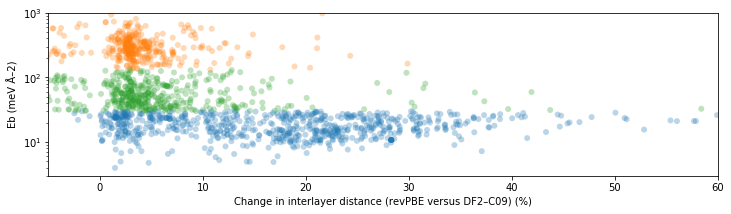

1560


In [45]:
i = 0
color = ['tab:blue',  'tab:green', 'tab:orange']
fig, ax = plt.subplots(figsize=(12, 3))
for key in revpbe.keys():
    if key in binding_energies.keys():
    
        try:
            x = abs(df2[key]['cell'][2][2]-revpbe[key]['cell'][2][2])/df2[key]['cell'][2][2]*100
            y = binding_energies[key]['df2']
            if y <= 30:
                a = plt.scatter(x,y, c = color[0], alpha=0.3, edgecolors='none', label = color[0])
                i = i +1
            elif 30 < y <= 130:
                b = plt.scatter(x,y, c = color[1], alpha=0.3, edgecolors='none', label = color[1])
                i = i +1
            else:
                plt.scatter(x,y, c = color[2], alpha=0.3, edgecolors='none', label = color[2])
                i = i +1
        except KeyError:
            pass
plt.yscale('log')
plt.xlim((-5,60))
plt.ylim((3,1000))
plt.xlabel("Change in interlayer distance (revPBE versus DF2–C09) (%)")
plt.ylabel("Eb (meV Å–2)")
plt.savefig("fig2.pdf",bbox_inches='tight',dpi=600)
plt.show()
print(i)

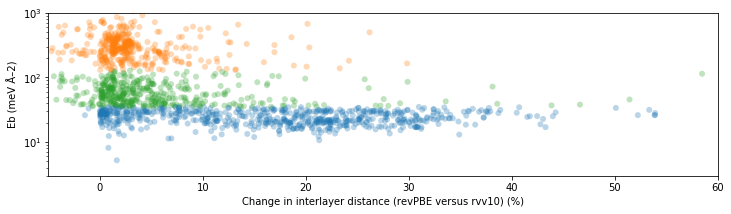

1533


In [46]:
i = 0
color = ['tab:blue',  'tab:green', 'tab:orange']
fig, ax = plt.subplots(figsize=(12, 3))
for key in revpbe.keys():
    if key in binding_energies.keys():
    
        try:
            x = abs(rvv10[key]['cell'][2][2]-revpbe[key]['cell'][2][2])/rvv10[key]['cell'][2][2]*100
            y = binding_energies[key]['rvv10']
            if y <= 35:
                a = plt.scatter(x,y, c = color[0], alpha=0.3, edgecolors='none', label = color[0])
                i = i +1
            elif 35 < y <= 130:
                b = plt.scatter(x,y, c = color[1], alpha=0.3, edgecolors='none', label = color[1])
                i = i +1
            else:
                plt.scatter(x,y, c = color[2], alpha=0.3, edgecolors='none', label = color[2])
                i = i +1
        except KeyError:
            pass
plt.yscale('log')
plt.xlim((-5,60))
plt.ylim((3,1000))
plt.xlabel("Change in interlayer distance (revPBE versus rvv10) (%)")
plt.ylabel("Eb (meV Å–2)")
plt.savefig("sup_fig2.pdf",bbox_inches='tight',dpi=600)
plt.show()
print(i)

In [255]:
EE = {}
PE = {}
HBE = {}
for key in binding_energies.keys():
    if 'rvv10' in binding_energies[key].keys():
        if 'df2' in binding_energies[key].keys():
            if binding_energies[key]['rvv10'] <= 35 or binding_energies[key]['df2'] <=30:
                EE[key]= binding_energies[key]
            elif 35 < binding_energies[key]['rvv10'] <= 130 or 30 < binding_energies[key]['df2'] <= 130:
                PE[key]= binding_energies[key]
            else:
                HBE[key] = binding_energies[key]
        else:
            if binding_energies[key]['rvv10'] <= 35:
                EE[key]= binding_energies[key]
            elif 35 < binding_energies[key]['rvv10'] <= 130:
                PE[key]= binding_energies[key]
            else:
                HBE[key] = binding_energies[key] 
    else:
        if binding_energies[key]['df2'] <=30:
            EE[key]= binding_energies[key]
        elif 30 < binding_energies[key]['df2'] <= 130:
            PE[key]= binding_energies[key]
        else:
            HBE[key] = binding_energies[key]

In [256]:
print(len(EE))
print(len(PE))
print(len(HBE))

1227
794
642


Using these criteria, and after removal of duplicates (that is, identical 2D materials that come from different parents, see Methods), we obtain 1,036 easily exfoliable and 789 potentially exfoliable com- pounds, for a total of 1,825 candidates.

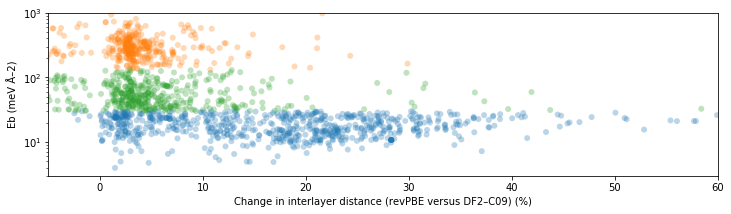

1560


In [257]:
i = 0
color = ['tab:blue',  'tab:green', 'tab:orange']
fig, ax = plt.subplots(figsize=(12, 3))
for key in revpbe.keys():
    if key in binding_energies.keys():
    
        try:
            x = abs(df2[key]['cell'][2][2]-revpbe[key]['cell'][2][2])/df2[key]['cell'][2][2]*100
            y = binding_energies[key]['df2']
            if y <= 30:
                a = plt.scatter(x,y, c = color[0], alpha=0.3, edgecolors='none', label = color[0])
                i = i +1
            elif 30 < y <= 130:
                b = plt.scatter(x,y, c = color[1], alpha=0.3, edgecolors='none', label = color[1])
                i = i +1
            else:
                plt.scatter(x,y, c = color[2], alpha=0.3, edgecolors='none', label = color[2])
                i = i +1
        except KeyError:
            pass
plt.yscale('log')
plt.xlim((-5,60))
plt.ylim((3,1000))
plt.xlabel("Change in interlayer distance (revPBE versus DF2–C09) (%)")
plt.ylabel("Eb (meV Å–2)")
plt.savefig("fig2.pdf",bbox_inches='tight',dpi=600)
plt.show()
print(i)

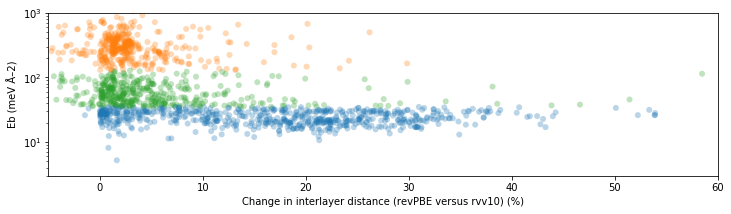

1533


In [258]:
i = 0
color = ['tab:blue',  'tab:green', 'tab:orange']
fig, ax = plt.subplots(figsize=(12, 3))
for key in revpbe.keys():
    if key in binding_energies.keys():
    
        try:
            x = abs(rvv10[key]['cell'][2][2]-revpbe[key]['cell'][2][2])/rvv10[key]['cell'][2][2]*100
            y = binding_energies[key]['rvv10']
            if y <= 35:
                a = plt.scatter(x,y, c = color[0], alpha=0.3, edgecolors='none', label = color[0])
                i = i +1
            elif 35 < y <= 130:
                b = plt.scatter(x,y, c = color[1], alpha=0.3, edgecolors='none', label = color[1])
                i = i +1
            else:
                plt.scatter(x,y, c = color[2], alpha=0.3, edgecolors='none', label = color[2])
                i = i +1
        except KeyError:
            pass
plt.yscale('log')
plt.xlim((-5,60))
plt.ylim((3,1000))
plt.xlabel("Change in interlayer distance (revPBE versus rvv10) (%)")
plt.ylabel("Eb (meV Å–2)")
plt.savefig("sup_fig2.pdf",bbox_inches='tight',dpi=600)
plt.show()
print(i)